# Notebook for Atalanta vs. Lazio 2019/2020

In [1]:
import asyncio
import json
import aiohttp
from understat import Understat
import pandas as pd
import nest_asyncio
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np

sns.set_context("paper")
nest_asyncio.apply()

%matplotlib inline

## Functions for plotting pitch

In [2]:
def create_pitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    #Display Pitch
    return fig, ax

# Getting data from understat

In [3]:
async def request_players(match_id, home):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_match_players(match_id)

        return players[home]

def get_players_df(match_id, home):
    loop = asyncio.get_event_loop()
    json_obj = json.dumps(loop.run_until_complete(request_players(match_id, home)))
    df = pd.read_json(json_obj).T

    return df.reset_index(drop=True)

async def request_match_shots(match_id, home):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        shots = await understat.get_match_shots(match_id)

        return shots[home]

def get_match_shots_df(match_id, home):
    loop = asyncio.get_event_loop()
    json_obj = json.dumps(loop.run_until_complete(request_match_shots(match_id, home)))
    df = pd.read_json(json_obj)

    return df.reset_index(drop=True)

# display(get_players_df(match_id, 'h')) # atalanta
# display(get_players_df(match_id, 'a')) # roma


## Draw Map of Shots on Goal

In [4]:
match_id = 13349

atalanta = get_match_shots_df(match_id, "h")
lazio = get_match_shots_df(match_id, "a")

In [5]:
display(atalanta)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,366450,4,MissedShots,0.865,0.524,0.368038,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
1,366451,4,OwnGoal,0.085,0.496,0.000000,Marten de Roon,h,1710,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
2,366453,15,BlockedShot,0.820,0.504,0.023528,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Berat Gjimshiti,HeadPass
3,366454,17,MissedShots,0.806,0.331,0.027981,Marten de Roon,h,1710,FromCorner,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Ruslan Malinovskiy,Cross
4,366455,23,BlockedShot,0.716,0.349,0.037257,Ruslan Malinovskiy,h,7947,DirectFreekick,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Standard
5,366456,27,SavedShot,0.919,0.557,0.114647,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
6,366457,27,MissedShots,0.936,0.515,0.505001,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
7,366459,29,BlockedShot,0.796,0.676,0.022191,Alejandro Gomez,h,1491,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Ruslan Malinovskiy,Pass
8,366460,29,SavedShot,0.727,0.494,0.015058,Ruslan Malinovskiy,h,7947,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
9,366461,30,MissedShots,0.939,0.311,0.041921,Berat Gjimshiti,h,1927,FromCorner,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Duván Zapata,None


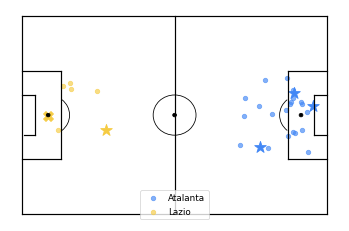

In [6]:
# display(ata_df)

fig,ax = create_pitch()
ata_df = atalanta.copy()
laz_df = lazio.copy()

ata_df["X"] *= 130
ata_df["Y"] *= 90
ata_goals = ata_df[ata_df.result == "Goal"]
ata_shots = ata_df[(ata_df.result != "Goal") & (ata_df.result != "OwnGoal")]
ata_owngoal = ata_df[ata_df.result == "OwnGoal"]


laz_df["X"] *= 130
laz_df["Y"] *= 90
laz_goals = laz_df[laz_df.result == "Goal"]
laz_shots = laz_df[laz_df.result != "Goal"]


# display(ata_goals)
plt.scatter(ata_goals['X'], ata_goals['Y'], marker="*", s=150, c="#4287f5")
plt.scatter(ata_shots['X'], ata_shots['Y'], s=20, alpha=0.65, c="#4287f5", label="Atalanta")

# Annotate gosens goal
# for row in ata_goals.iterrows():
#     txt = row[1]["player"]
#     loc = (row[1]["X"], row[1]["Y"])
#     ax.annotate(txt, 
#                 xy=loc, 
#                 xytext=(loc[0]-40, loc[1]+10), 
#                 arrowprops=dict(arrowstyle="->", color="k")
#                )
#     break
    
plt.scatter(ata_owngoal['X'], ata_owngoal['Y'], marker="X", s=100,c="#f5cb42" )

plt.scatter(130-laz_goals['X'], laz_goals['Y'], marker="*", s=150, c="#f5cb42")
plt.scatter(130-laz_shots['X'], laz_shots['Y'], s=20, alpha=0.65, c="#f5cb42", label="Lazio")
plt.legend()

plt.savefig("shot_map.png", dpi=600)

# Shot Types

In [7]:
# n_shots_open = ata_df[ata_df["situation"] == "OpenPlay"].count()
# n_shots_corners = ata_df[ata_df["situation"] == "FromCorner"].count()["shotType"]

n_shots_open = np.sum(ata_df["situation"] == "OpenPlay")
n_shots_corner = np.sum(ata_df["situation"] == "FromCorner")
print(n_shots_open, n_shots_corner)

17 7


# Get Matchday Stats

In [8]:
gw = 26
ata_match_stats = pd.read_csv("data/Data/Serie_A/Team_Data/2019_season/Atalanta_2019_season data.csv").iloc[[gw]]
laz_match_stats = pd.read_csv("data/Data/Serie_A/Team_Data/2019_season/Lazio_2019_season data.csv").iloc[[gw]]

ata_match_stats["team"] = "Atalanta"
laz_match_stats["team"] = "Lazio"

df = pd.concat([ata_match_stats, laz_match_stats])

In [9]:
display(df)

,GW,date,result,Home/Away,xG,scored,xGA,conceded,xpts,pts,npxG,npxGA,ppda,ppda_allowed,ppda_coef,oppda_coef,deep,deep_allowed,npxGD,team
26,27,2020-06-24 19:45:00,w,h,2.255860,3,0.661396,2,2.4950,3,2.255860,0.661396,"{'att': 209, 'def': 30}","{'att': 241, 'def': 16}",6.966667,15.062500,17,4,1.594464,Atalanta
26,27,2020-06-24 19:45:00,l,a,0.661396,2,2.255860,3,0.3482,0,0.661396,2.255860,"{'att': 241, 'def': 16}","{'att': 209, 'def': 30}",15.062500,6.966667,4,17,-1.594464,Lazio


# Get Match Players

In [10]:
async def match_players(h):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_match_players(match_id)

        return players[h]
    
loop = asyncio.get_event_loop()
ata_players_json = json.dumps(loop.run_until_complete(match_players("h")))
laz_players_json = json.dumps(loop.run_until_complete(match_players("a")))

ata_players_df = pd.read_json(ata_players_json).T.reset_index(drop=True)
laz_players_df = pd.read_json(laz_players_json).T.reset_index(drop=True)

## Polar Plot

In [11]:
import plotly.express as px

cols = ["goals", "xG", "shots", "key_passes", "assists", "xA", "xGChain", "xGBuildup"]
def polar_plot(data, player_id, cols):
        
    player_df = data.loc[data["id"] == player_id]
    display(player_df)
    player_name = player_df["player"].values[0] # values always returns a list
    
    
    dictionary = dict(r = player_df[cols].values[0],
                  theta = cols,
                  name = player_name)
    
    df = pd.DataFrame(dictionary)

    fig = px.line_polar(df, r='r', theta='theta', line_close=True)
    fig.update_traces(fill='toself')
    return fig

def normalize_cols(data,cols):
    lt = []
    for col in cols:
        sorted_vals = np.sort(ata_players_df[col].values)
        lt.append((float(sorted_vals[0]), float(sorted_vals[-1]))) # get min and max in order to normalize rest of cols
    return lt
    

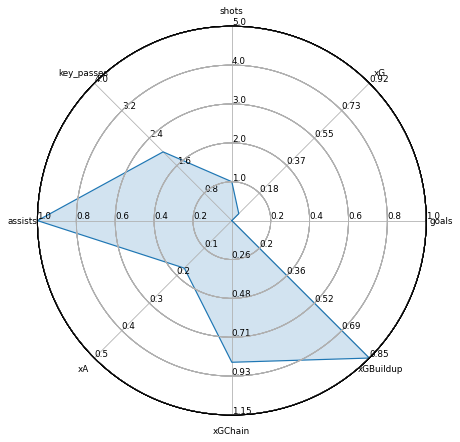

In [12]:
def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        

        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
        for r_label in self.ax.get_yticklabels():
            r_label.set_text('')
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


variables = cols

ata = ata_players_df.loc[ata_players_df.id == "402552"]
data = np.array(ata[cols].values[0]).astype(np.float)
ranges = normalize_cols(ata_players_df, cols)  



fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data)
radar.fill(data, alpha=0.2)
plt.savefig("hateboer.png", dpi=250)
plt.show()    


## Statistics

In [13]:
display(atalanta)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,366450,4,MissedShots,0.865,0.524,0.368038,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
1,366451,4,OwnGoal,0.085,0.496,0.000000,Marten de Roon,h,1710,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
2,366453,15,BlockedShot,0.820,0.504,0.023528,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Berat Gjimshiti,HeadPass
3,366454,17,MissedShots,0.806,0.331,0.027981,Marten de Roon,h,1710,FromCorner,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Ruslan Malinovskiy,Cross
4,366455,23,BlockedShot,0.716,0.349,0.037257,Ruslan Malinovskiy,h,7947,DirectFreekick,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Standard
5,366456,27,SavedShot,0.919,0.557,0.114647,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
6,366457,27,MissedShots,0.936,0.515,0.505001,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
7,366459,29,BlockedShot,0.796,0.676,0.022191,Alejandro Gomez,h,1491,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Ruslan Malinovskiy,Pass
8,366460,29,SavedShot,0.727,0.494,0.015058,Ruslan Malinovskiy,h,7947,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
9,366461,30,MissedShots,0.939,0.311,0.041921,Berat Gjimshiti,h,1927,FromCorner,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Duván Zapata,None


# Get Player Assists

In [14]:
open_play = atalanta.loc[atalanta["situation"] == "OpenPlay"]

In [15]:
display(open_play)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,366450,4,MissedShots,0.865,0.524,0.368038,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
1,366451,4,OwnGoal,0.085,0.496,0.000000,Marten de Roon,h,1710,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
2,366453,15,BlockedShot,0.820,0.504,0.023528,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Berat Gjimshiti,HeadPass
5,366456,27,SavedShot,0.919,0.557,0.114647,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
6,366457,27,MissedShots,0.936,0.515,0.505001,Duván Zapata,h,1148,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Rebound
7,366459,29,BlockedShot,0.796,0.676,0.022191,Alejandro Gomez,h,1491,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Ruslan Malinovskiy,Pass
8,366460,29,SavedShot,0.727,0.494,0.015058,Ruslan Malinovskiy,h,7947,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Remo Freuler,Pass
12,366465,37,Goal,0.892,0.610,0.032427,Robin Gosens,h,6155,OpenPlay,2019,Head,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Hans Hateboer,Aerial
13,366467,42,MissedShots,0.731,0.587,0.018844,Alejandro Gomez,h,1491,OpenPlay,2019,RightFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,Rafael Toloi,Pass
14,366468,44,SavedShot,0.868,0.690,0.039836,Robin Gosens,h,6155,OpenPlay,2019,LeftFoot,13349,Atalanta,Lazio,3,2,2020-06-24 19:45:00,None,Dispossessed


{'Remo Freuler': 3, 'Berat Gjimshiti': 1, 'Ruslan Malinovskiy': 1, 'Hans Hateboer': 2, 'Rafael Toloi': 1, 'Alejandro Gomez': 2, 'Luis Muriel': 2}
['Remo Freuler', 'Berat Gjimshiti', 'Ruslan Malinovskiy', 'Hans Hateboer', 'Rafael Toloi', 'Alejandro Gomez', 'Luis Muriel']
[3, 1, 1, 2, 1, 2, 2]


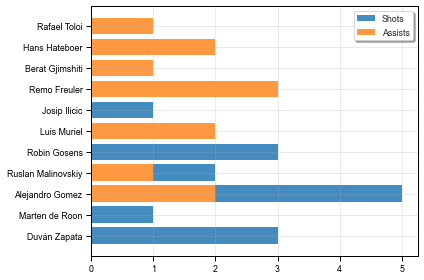

In [16]:
# plot horizantal bar plot with assists on the left and shots on the right
# remove "None" values

from collections import Counter

assists = Counter(open_play["player_assisted"])
shots = Counter(open_play["player"])

assists_cleaned = {}
for k,v in assists.items():
    if k is not None:
        assists_cleaned[k] = v
        
        if k not in shots:
            shots[k] = 0
            
print(assists_cleaned)
# explicitly convert to lists for plotting horizantal bar
shots_key = list(shots.keys())
shots_val = list(shots.values())
assists_key = list(assists_cleaned.keys())
assists_val = list(assists_cleaned.values())

print(assists_key)
print(assists_val)



# Plotting
plt.barh(shots_key, shots_val, label="Shots", color="#448cc0")
plt.barh(assists_key, assists_val,  label="Assists", color="#fe9942")

# styling
sns.set_style("whitegrid")
plt.grid(alpha=0.3)
plt.legend(frameon=True,shadow=True)
plt.tight_layout()

# save fig
plt.savefig("shots_vs_assists.png", dpi=600)

# Passing Networks

In [17]:
# ref: https://github.com/Friends-of-Tracking-Data-FoTD/mapping-match-events-in-Python

from utils import *
from plot_utils import *
from metrics import *

In [18]:
data_download()
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset()


Download completed


In [19]:
def passing_networks(match_id=2576105):
    """
    Construct the passing networks of the teams in the match.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    Returns
    -------
    tuple
        the two constructed networks, as networkx objects.
    """
    
    # take the names of the two teams of the match
    match_label = match_id2match[match_id]['label']
    team1_name = match_label.split('-')[0].split(' ')[0]
    team2_name = match_label.split('-')[1].split(' ')[1].split(',')[0]
    
    # take all the events of the match
    match_events = []
    for event in match_id2events[match_id]:
        if event['eventName'] == 'Pass':
            match_events.append(event)

    match_events_df = pd.DataFrame(match_events)
    first_half_max_duration = np.max(match_events_df[match_events_df['matchPeriod'] == '1H']['eventSec'])

    # sum 1H time end to all the time in 2H
    for event in match_events:
        if event['matchPeriod'] == '2H':
            event['eventSec'] += first_half_max_duration
    
    team2pass2weight = defaultdict(lambda: defaultdict(int))
    for event, next_event, next_next_event in zip(match_events, match_events[1:], match_events[2:]):
        try:
            if event['eventName'] == 'Pass' and ACCURATE_PASS in [tag['id'] for tag in event['tags']]:
                sender = player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                # case of duel
                if next_event['eventName'] == 'Duel':
                    # if the next event of from a playero of the same tema
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                    else:
                        receiver = player_id2player[next_next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                else:  # any other event 
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
        except KeyError:
            pass
    # crete networkx graphs
    G1, G2 = nx.DiGraph(team=team1_name), nx.DiGraph(team=team2_name)
    for (sender, receiver), weight in team2pass2weight[team1_name].items():
        G1.add_edge(sender, receiver, weight=weight)
    for (sender, receiver), weight in team2pass2weight[team2_name].items():
        G2.add_edge(sender, receiver, weight=weight)    
    
    return G1, G2

In [20]:
def plot_passing_networks(G1, G2):
    """
    Plot the two passing networks in input.
    
    Parameters
    ----------
    G1 : networkx object
        the object representing the first network
        
    G2 : networkx object
        the object representing the second network
    """
    pos1 = nx.spring_layout(G1, 4)
    pos2 = nx.spring_layout(G2, 4)
    nome2degree = dict(G1.degree)
    nx.draw(G1, pos=pos1, nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()], 
            node_color='red', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()
    
    nome2degree = dict(G2.degree)
    nx.draw(G2, pos=pos2, nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()],
            node_color='blue', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()

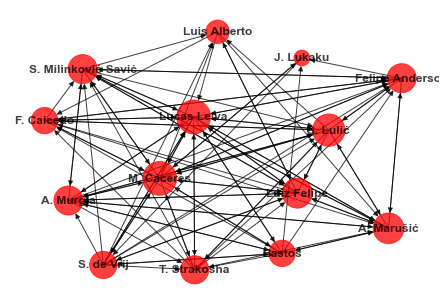

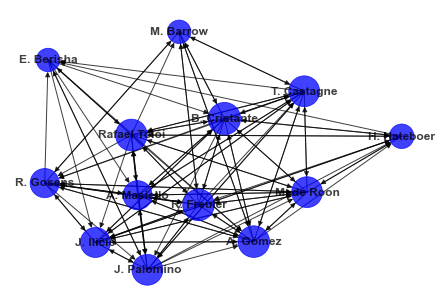

In [21]:
G1, G2 = passing_networks(match_id=2576309)
plot_passing_networks(G1, G2)

# Flow Centrality

In [22]:
def get_players_flow_centrality():
    """
    Compute the sequence of flow centralities for each player.
        
    Returns
    -------
    dict
        a dictionary of player names to a list of flow centralities
        (one per each match played by the player).
    """
    player2centralities = defaultdict(list)
    for match in tqdm.tqdm(match_id2match.values()):
        match_id = match['wyId']
        G1, G2 = passing_networks(match_id=match_id)
        if G1.number_of_nodes() > 0:
            for player_name in G1.nodes():
                G1 = G1.to_undirected()
                if nx.is_connected(G1):
                    flow_centrality = nx.current_flow_betweenness_centrality(G1)[player_name]
                    player2centralities[player_name].append(flow_centrality)
        if G2.number_of_nodes() > 0:
            for player_name in G2.nodes():
                G2 = G2.to_undirected()
                if nx.is_connected(G2):
                    flow_centrality = nx.current_flow_betweenness_centrality(G2)[player_name]
                    player2centralities[player_name].append(flow_centrality)
    return player2centralities

def plot_flow_centrality(players_centralities, names):
    """
    Plot the flow centralities in time of the players.
    
    Parameters
    ----------
    players_centralities : list of lists
        the list of the list of flow centralities of the player
        
    names : list
        the list of players
    """
    sns.set_style('ticks')

    f,ax = plt.subplots(figsize=(10,5))
    for player_centralities, player_name in zip(players_centralities, names):
        sns.kdeplot(pd.DataFrame(player_centralities, columns=['flow centrality'])['flow centrality'], 
                    shade=True, label=player_name)
    plt.grid(alpha=0.3)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('flow centrality', fontsize=25)
    plt.ylabel('p(flow centrality)', fontsize=25)
    lab = ax.legend(loc=1,fontsize=18,frameon=True,shadow=True)
    f.tight_layout()
    plt.show()

In [23]:
player2centralities = get_players_flow_centrality()

100%|██████████| 380/380 [01:31<00:00,  4.13it/s]


In [24]:
hateboer_fcs = player2centralities['H. Hateboer']
gomez_fcs = player2centralities['A. Gómez']
gosens_fcs = player2centralities['R. Gosens']

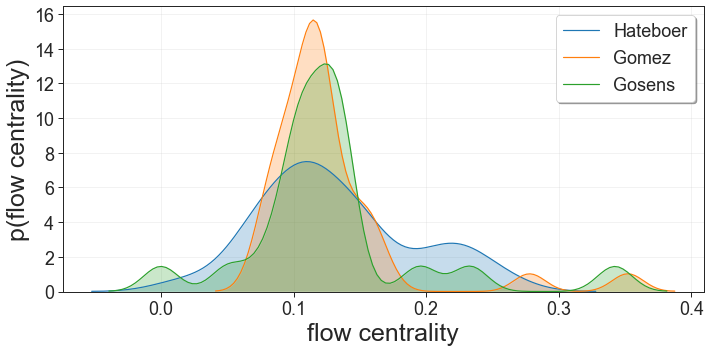

In [25]:
plot_flow_centrality([hateboer_fcs, gomez_fcs, gosens_fcs], 
                     ['Hateboer', "Gomez", "Gosens"])

# Player Radar Graphs

In [26]:
async def request_player_stats(id, options=None):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_stats(id, options)
        return player_shots

def get_player_stats(player_id, options=None):
    loop = asyncio.get_event_loop()
    obj = loop.run_until_complete(request_player_stats(player_id, options))
    
    return obj


In [27]:
hateboer_id = 4941
obj = get_player_stats(hateboer_id, ["MR"])

In [28]:
# write to json file for future us
with open('hateboer_stats.json', 'w+') as outfile:
    json.dump(obj, outfile, indent=4)

In [29]:
# open jswon file
with open("hateboer_stats.json", "r") as f:
   htb_stats = json.load(f)

In [30]:
print(htb_stats[0].keys())


dict_keys(['goals', 'xG', 'shots', 'assists', 'xA', 'key_passes', 'xGChain', 'xGBuildup', 'position'])


In [31]:
import plotly.express as px

players = []
name2id = {}

id2name = {4941: "Hateboer", 1710: "de Roon", 7947: "Malinovskiy", 6155: "Gosens", 2019: "Matuidi", 1290: " Pjanic",
          1791: "Alexander-Arnold", 1688: "Robertson"}
for k,v, in id2name.items():
    name2id[v] = k
    

avgs = []
maxs = []
htb_vals = list(htb_stats[0].values())
htb_keys = list(htb_stats[0].keys())

# print(htb_vals)
for elem in htb_vals[:-1]:
    avgs.append(elem["avg"])
    maxs.append(elem["max"])

  
print(avgs)
print(maxs)
# df = pd.DataFrame(dict(r=vals,theta=htb_keys[:-1]))

# fig = px.line_polar(df, r='r', theta='theta', line_close=True)
# fig.show()

[0.0014, 0.00146385, 0.0162, 0.0015, 0.0015276, 0.0146, 0.00383968, 0.00180971]
[0.0033, 0.00294841, 0.0262, 0.0023, 0.00257078, 0.0195, 0.00524829, 0.00300881]


In [32]:
async def request_team_players(team, season):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        results = await understat.get_team_players("Atalanta", 2019)
        return results

def get_player_pos_ids(team, season, pos=None):
    loop = asyncio.get_event_loop()
    obj = loop.run_until_complete(request_team_players(team,season))
    
    return obj

def get_seriea_pos_stats(season, pos=None):
    """
    Get stats from all players of a certain position within a league's season
    """
    # hardcode values since lib is broken
    teams = ["Atalanta", "AC Milan", "Bologna", "Brescia", "Cagliari", 
             "Fiorentina", "Genoa", "Inter", "Juventus", "Lazio", 
            "Lecce", "Lazio", "Parma Calcio 1913", "Roma", "SPAL 2013",
            "Sampdoria", "Sassuolo", "Torino", "Udinese", "Verona"]
    
    print(get_player_pos_ids(teams[0], 2019, pos))


In [33]:
get_seriea_pos_stats(season=2019)

[{'id': '1148', 'player_name': 'Duván Zapata', 'games': '28', 'time': '2047', 'goals': '18', 'xG': '15.833168610930443', 'assists': '6', 'xA': '5.763872463256121', 'shots': '89', 'key_passes': '38', 'yellow_cards': '1', 'red_cards': '0', 'position': 'F S', 'team_title': 'Atalanta', 'npg': '17', 'npxG': '15.071869760751724', 'xGChain': '21.968365827575326', 'xGBuildup': '4.951401550322771'}, {'id': '1229', 'player_name': 'Luis Muriel', 'games': '34', 'time': '1225', 'goals': '18', 'xG': '13.168777784332633', 'assists': '1', 'xA': '4.701555393636227', 'shots': '77', 'key_passes': '36', 'yellow_cards': '1', 'red_cards': '0', 'position': 'F S', 'team_title': 'Atalanta', 'npg': '12', 'npxG': '7.839686108753085', 'xGChain': '15.924877859652042', 'xGBuildup': '5.697577059268951'}, {'id': '1426', 'player_name': 'Josip Ilicic', 'games': '26', 'time': '1682', 'goals': '15', 'xG': '10.302356086671352', 'assists': '5', 'xA': '7.094770606607199', 'shots': '81', 'key_passes': '53', 'yellow_cards': '

In [34]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        results = await understat.get_team_players(
            "Atalanta",
            2019        )
        print(json.dumps(results))

loop = asyncio.get_event_loop()
loop.run_until_complete(main())

[{"id": "1148", "player_name": "Duv\u00e1n Zapata", "games": "28", "time": "2047", "goals": "18", "xG": "15.833168610930443", "assists": "6", "xA": "5.763872463256121", "shots": "89", "key_passes": "38", "yellow_cards": "1", "red_cards": "0", "position": "F S", "team_title": "Atalanta", "npg": "17", "npxG": "15.071869760751724", "xGChain": "21.968365827575326", "xGBuildup": "4.951401550322771"}, {"id": "1229", "player_name": "Luis Muriel", "games": "34", "time": "1225", "goals": "18", "xG": "13.168777784332633", "assists": "1", "xA": "4.701555393636227", "shots": "77", "key_passes": "36", "yellow_cards": "1", "red_cards": "0", "position": "F S", "team_title": "Atalanta", "npg": "12", "npxG": "7.839686108753085", "xGChain": "15.924877859652042", "xGBuildup": "5.697577059268951"}, {"id": "1426", "player_name": "Josip Ilicic", "games": "26", "time": "1682", "goals": "15", "xG": "10.302356086671352", "assists": "5", "xA": "7.094770606607199", "shots": "81", "key_passes": "53", "yellow_card

# Get Stats for all Serie A Players

In [42]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "Serie A",
            2019,
        )
        json_obj = json.dumps(players)
        df = pd.read_json(json_obj)
        return df

        
loop = asyncio.get_event_loop()
serie_a_players_df = loop.run_until_complete(main())

In [46]:
players_cleaned = serie_a_players_df.drop(columns=["id", "player_name", "time", "games", "yellow_cards", "red_cards", "team_title"])

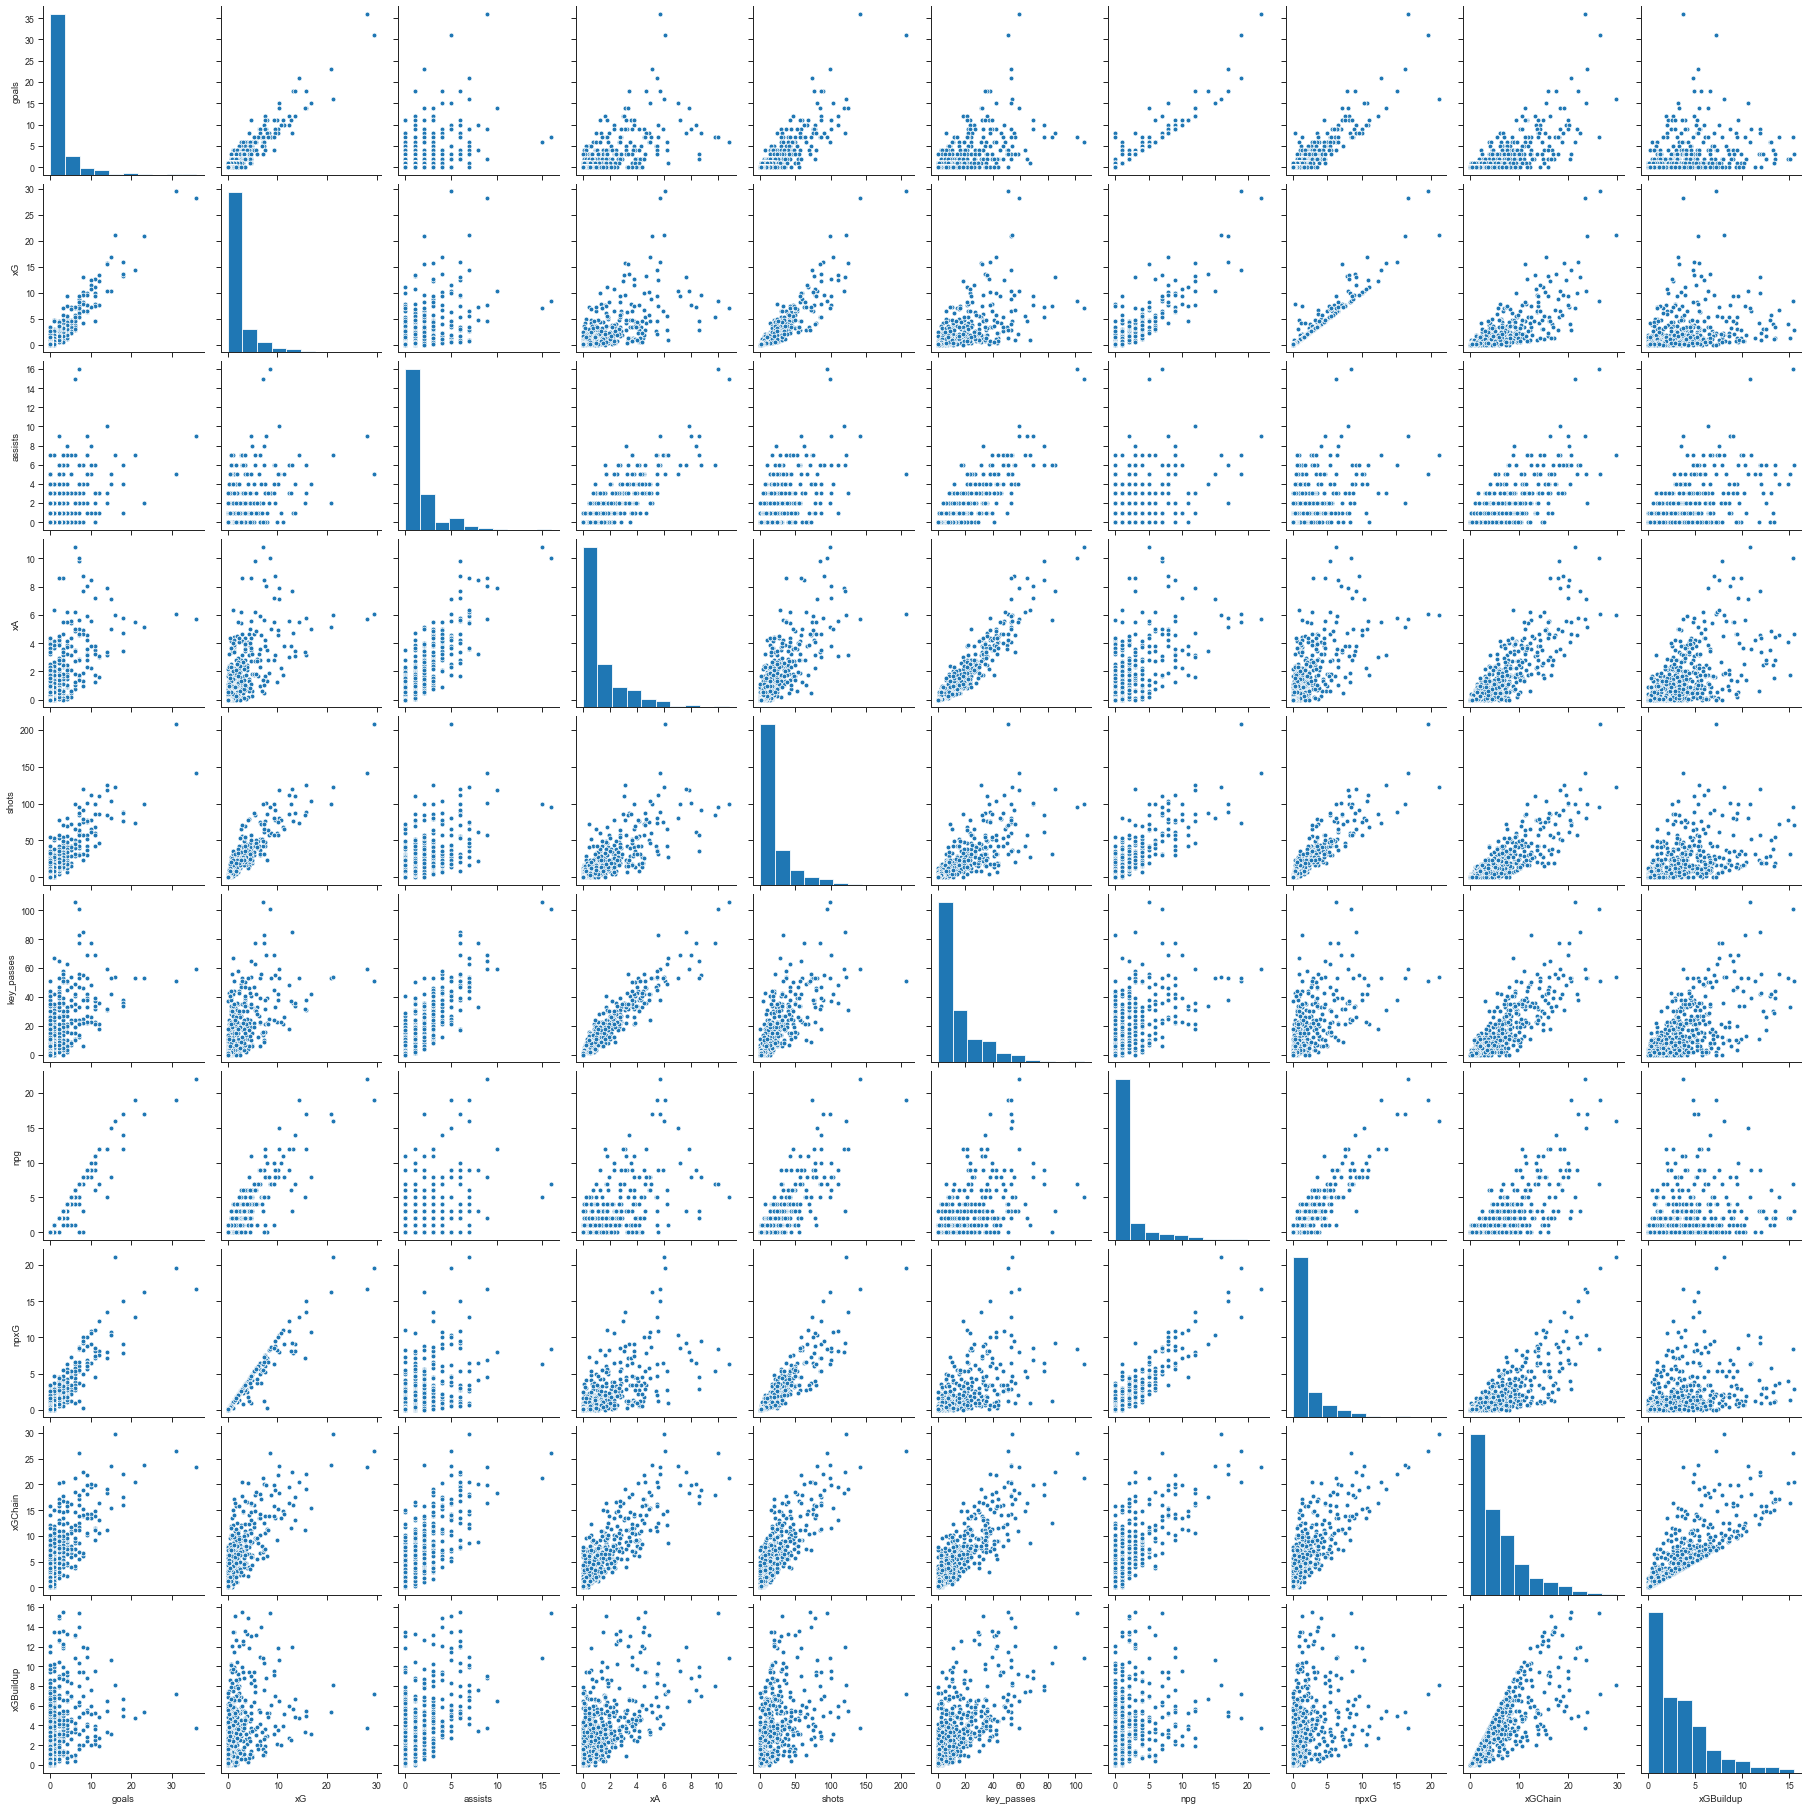

In [47]:
sns.pairplot(players_cleaned)